In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
animals = pd.read_csv("zoo.csv")
animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
animals.shape

(101, 18)

This dataset has 101 rows and 18 columns

##  The animal types

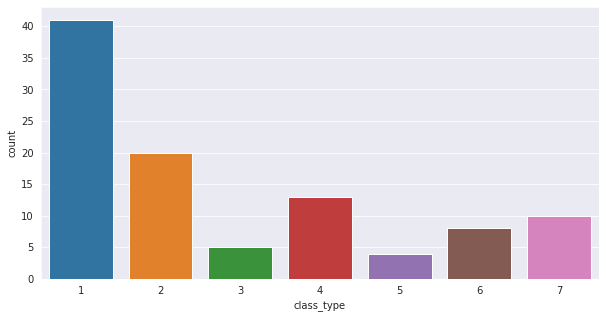

In [4]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.countplot(animals['class_type'])

This dataset consists of 7 types of classes, namely:
* 1: mammal
* 2: bird
* 3: reptile
* 4: fish
* 5: amphibian
* 6: insect / arachnid
* 7: invertebrate

## Correlation plot of 16 animal features
animal_name and class_type columns are not included

Text(0.5, 1.05, 'Correlation of Animal Features')

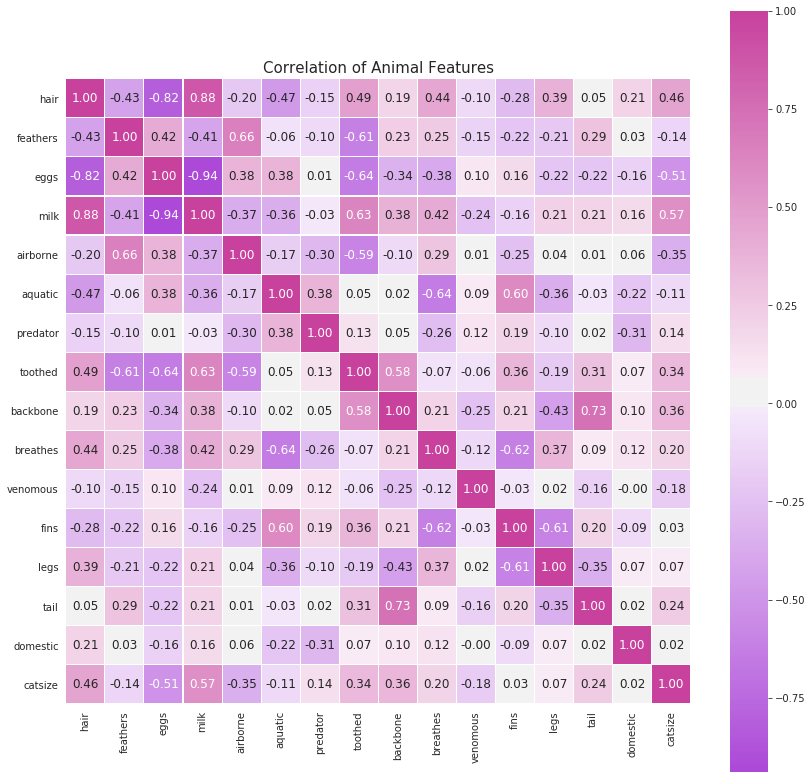

In [5]:
corr = animals.iloc[:, 1:-1].corr()

colormap = sns.diverging_palette(650, 690, as_cmap = True)
plt.figure(figsize=(14, 14))
sns.heatmap(corr, cbar = True, square = True, annot = True,
            fmt = '.2f', annot_kws = {'size': 12}, 
            cmap = colormap, linewidths = 0.1, linecolor = 'white')
plt.title('Correlation of Animal Features', y = 1.05, size = 15)

# <a>Prepare for Machine Learning<a>

## Features & Label

From the dataset consisting of 18 columns taken 17 columns as a feature (x_data) and 1 column as a label (y_data) used for comparison with prediction results

In [6]:
x_data = animals.iloc[:, :-1]
y_data = animals.iloc[:, -1:]

## Train and test data

The dataset is divided into 2 parts, 70% for training data and 30% for testing data

In [7]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, 
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y_data)

print('Training data has :', train_x.shape)
print('Testing data has :', test_x.shape)

Training data has : (70, 17)
Testing data has : (31, 17)


* Save the **animal_name** column for later combination(results).
* Drop the **animal_name** column in train, test datasets, because it's unnecessary for model learning predictions.

In [8]:
train_name = train_x['animal_name']
test_name = test_x['animal_name']

train_x = train_x.iloc[:, 1:]
test_x = test_x.iloc[:, 1:]

print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 16)
Testing Data has (31, 16)


## Placeholder
Placeholder is one of the function in tensorflow. It is a space to put and change values while the program is running.

* for X, a place must have 16 columns, since zoo data has 16 features.
* for Y, a place must have 1 columns, since the results has 1 outcome.
* "None", it means it has no size limits.

In [9]:
X = tf.placeholder(tf.float32, [None, 16]) 
Y = tf.placeholder(tf.int32, [None, 1])

Y_one_hot = tf.one_hot(Y, 7)
Y_one_hot = tf.reshape(Y_one_hot, [-1, 7])

## Make weight and bias value

In [10]:
W = tf.Variable(tf.random_normal([16, 7], seed = 0), name = 'weight')
b = tf.Variable(tf.random_normal([7], seed = 0), name = 'bias')

# Output

**Output = Weight * Input + Bias**

In [11]:
logits = tf.matmul(X, W) + b
hypotesis = tf.nn.softmax(logits)
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

# Original vs prediction

In [12]:
prediction = tf.arg_max(hypotesis, 1)
correct_prediction = tf.equal(prediction, tf.arg_max(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Activate Model

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(train, feed_dict = {X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print('Step: {:5}\tloss: {:.3f}\tAcc: {:.2%}'.format(step, loss, acc))
            
        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc, test_predict, test_correct = sess.run([accuracy, prediction, correct_prediction], feed_dict={X: test_x, Y: test_y})
        print('Model Prediction =', train_acc)
        print('Test Prediction', test_acc)

Step:     0	loss: 3.402	Acc: 30.00%
Model Prediction = 0.3
Test Prediction 0.29032257
Model Prediction = 0.2857143
Test Prediction 0.29032257
Model Prediction = 0.31428573
Test Prediction 0.29032257
Model Prediction = 0.31428573
Test Prediction 0.29032257
Model Prediction = 0.31428573
Test Prediction 0.29032257
Model Prediction = 0.35714287
Test Prediction 0.32258064
Model Prediction = 0.35714287
Test Prediction 0.32258064
Model Prediction = 0.35714287
Test Prediction 0.32258064
Model Prediction = 0.35714287
Test Prediction 0.32258064
Model Prediction = 0.35714287
Test Prediction 0.32258064
Model Prediction = 0.37142858
Test Prediction 0.32258064
Model Prediction = 0.37142858
Test Prediction 0.32258064
Model Prediction = 0.37142858
Test Prediction 0.32258064
Model Prediction = 0.37142858
Test Prediction 0.32258064
Model Prediction = 0.37142858
Test Prediction 0.32258064
Model Prediction = 0.41428572
Test Prediction 0.32258064
Model Prediction = 0.41428572
Test Prediction 0.32258064
Mod

Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Prediction = 0.7714286
Test Prediction 0.8064516
Model Pred

Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.8064516
Model Prediction = 0.78571427
Test Prediction 0.

Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Pred

Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Prediction = 0.8428571
Test Prediction 0.8064516
Model Pred

Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.8064516
Model Prediction = 0.87142855
Test Prediction 0.

Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
Test Prediction 0.83870965
Model Prediction = 0.87142855
T

Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
Test Prediction 0.87096775
Model Prediction = 0.87142855
T

Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0.9
Test Prediction 0.9032258
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0.9
Test Prediction 0.9354839
Model Prediction = 0

## Result

In [14]:
sub = pd.DataFrame()
sub['Name'] = test_name
sub['Predict_Type'] = test_predict
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub

,Name,Predict_Type,Origin_Type,Correct
100,wren,2,2,True
58,penguin,2,2,True
43,lark,2,2,True
21,duck,2,2,True
10,cheetah,1,1,True
40,housefly,6,6,True
50,mongoose,1,1,True
4,boar,1,1,True
87,swan,2,2,True
80,slowworm,3,3,True


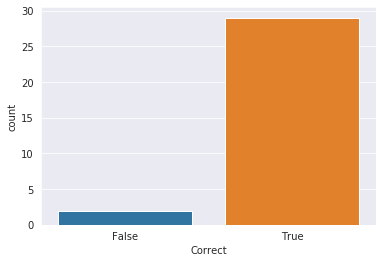

In [15]:
sns.countplot(sub['Correct'])

In [16]:
sub['Correct'].value_counts()

True     29
False     2
Name: Correct, dtype: int64